In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append(os.path.abspath('../'))

import warnings
warnings.filterwarnings("ignore")

from server2022.src.train_val import *
from server2022.src.model_features import *
from server2022.data.processed.prepare_data import *

In [2]:
def catboost_fit_predict(df, comment=''):
    model = CatBoostClassifier(iterations=500,
                               depth=5, 
                               l2_leaf_reg=5, 
                               learning_rate=0.01433,
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, 0.0006],
                               random_seed=RANDOM_STATE,
                              )

    make_report(model, df, treshold=0.5, to_file=False, need_val=True);

    X_train, X_test, y_train, y_test = data_split(df)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    probas = model.predict_proba(X_val)[:, 1]
    best = 0
    xx = 0
    for x in sorted(probas):
        pr = precision_score(y_val, probas >= x)
        rl = recall_score(y_val, probas >= x)
        cur = f1_score(y_val, probas >= x)
        if cur >= best:
            best = cur
            xx = x

    make_report(model, df, treshold=xx, to_file=True, file_path='../reports/report_0_years_update_2.csv', comment=comment, need_val=False)

## All features

In [3]:
df = create_df_0years_known()

In [4]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]

In [5]:
df.head(3)

,Наименование ДП,year,binary_target,Итого,Нематериальные активы total mean growth,Основные средства total mean growth,Внеоборотные активы total mean growth,Дебиторская задолженность total mean growth,Оборотные активы total mean growth,Уставный капитал total mean growth,Капитал и резервы total mean growth,Заёмные средства (долгосрочные) total mean growth,Долгосрочные обязательства total mean growth,Заёмные средства (краткосрочные) total mean growth,Кредиторская задолженность total mean growth,Краткосрочные обязательства total mean growth,Выручка total mean growth,Себестоимость продаж total mean growth,Прибыль (убыток) до налогообложения total mean growth,Прибыль (убыток) от продажи total mean growth,"log -4, Нематериальные активы, RUB","log -3, Нематериальные активы, RUB","log -2, Нематериальные активы, RUB","log -1, Нематериальные активы, RUB","log -4, Основные средства , RUB","log -3, Основные средства , RUB","log -2, Основные средства , RUB","log -1, Основные средства , RUB","log -4, Внеоборотные активы, RUB","log -3, Внеоборотные активы, RUB","log -2, Внеоборотные активы, RUB","log -1, Внеоборотные активы, RUB","log -4, Дебиторская задолженность, RUB","log -3, Дебиторская задолженность, RUB","log -2, Дебиторская задолженность, RUB","log -1, Дебиторская задолженность, RUB","log -4, Оборотные активы, RUB","log -3, Оборотные активы, RUB","log -2, Оборотные активы, RUB","log -1, Оборотные активы, RUB","log -4, Уставный капитал , RUB","log -3, Уставный капитал , RUB","log -2, Уставный капитал , RUB","log -1, Уставный капитал , RUB","log -4, Капитал и резервы, RUB","log -3, Капитал и резервы, RUB","log -2, Капитал и резервы, RUB","log -1, Капитал и резервы, RUB","log -4, Заёмные средства (долгосрочные), RUB","log -3, Заёмные средства (долгосрочные), RUB","log -2, Заёмные средства (долгосрочные), RUB","log -1, Заёмные средства (долгосрочные), RUB","log -4, Долгосрочные обязательства, RUB","log -3, Долгосрочные обязательства, RUB","log -2, Долгосрочные обязательства, RUB","log -1, Долгосрочные обязательства, RUB","log -4, Заёмные средства (краткосрочные), RUB","log -3, Заёмные средства (краткосрочные), RUB","log -2, Заёмные средства (краткосрочные), RUB","log -1, Заёмные средства (краткосрочные), RUB","log -4, Кредиторская задолженность, RUB","log -3, Кредиторская задолженность, RUB","log -2, Кредиторская задолженность, RUB","log -1, Кредиторская задолженность, RUB","log -4, Краткосрочные обязательства, RUB","log -3, Краткосрочные обязательства, RUB","log -2, Краткосрочные обязательства, RUB","log -1, Краткосрочные обязательства, RUB","log -4, Выручка, RUB","log -3, Выручка, RUB","log -2, Выручка, RUB","log -1, Выручка, RUB","log -4, Себестоимость продаж, RUB","log -3, Себестоимость продаж, RUB","log -2, Себестоимость продаж, RUB","log -1, Себестоимость продаж, RUB","log -4, Прибыль (убыток) до налогообложения , RUB","log -3, Прибыль (убыток) до налогообложения , RUB","log -2, Прибыль (убыток) до налогообложения , RUB","log -1, Прибыль (убыток) до налогообложения , RUB","log -4, Прибыль (убыток) от продажи, RUB","log -3, Прибыль (убыток) от продажи, RUB","log -2, Прибыль (убыток) от продажи, RUB","log -1, Прибыль (убыток) от продажи, RUB","Нематериальные активы ,прирост за -3 год","Нематериальные активы ,прирост за -2 год","Нематериальные активы ,прирост за -1 год","Основные средства ,прирост за -3 год","Основные средства ,прирост за -2 год","Основные средства ,прирост за -1 год","Внеоборотные активы ,прирост за -3 год","Внеоборотные активы ,прирост за -2 год","Внеоборотные активы ,прирост за -1 год","Дебиторская задолженность ,прирост за -3 год","Дебиторская задолженность ,прирост за -2 год","Дебиторская задолженность ,прирост за -1 год","Оборотные активы ,прирост за -3 год","Оборотные активы ,прирост за -2 год","Оборотные активы ,прирост за -1 год","Уставный капитал ,прирост за -3 год","Уставный капитал ,прирост за -2 год","Уставный капитал ,прирост за -1 год","Капитал и резервы ,прирост за -3 год","Капитал и резервы ,прирост за 

Fitting model <catboost.core.CatBoostClassifier object at 0x0000023A9BEF0550> with treshold = 0.5...


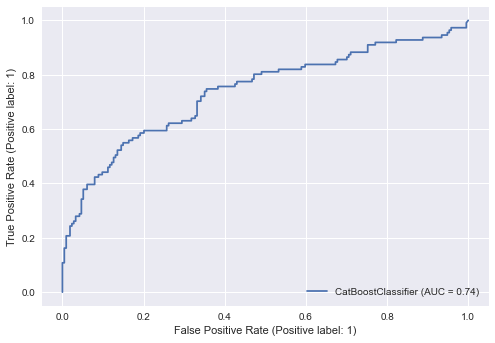

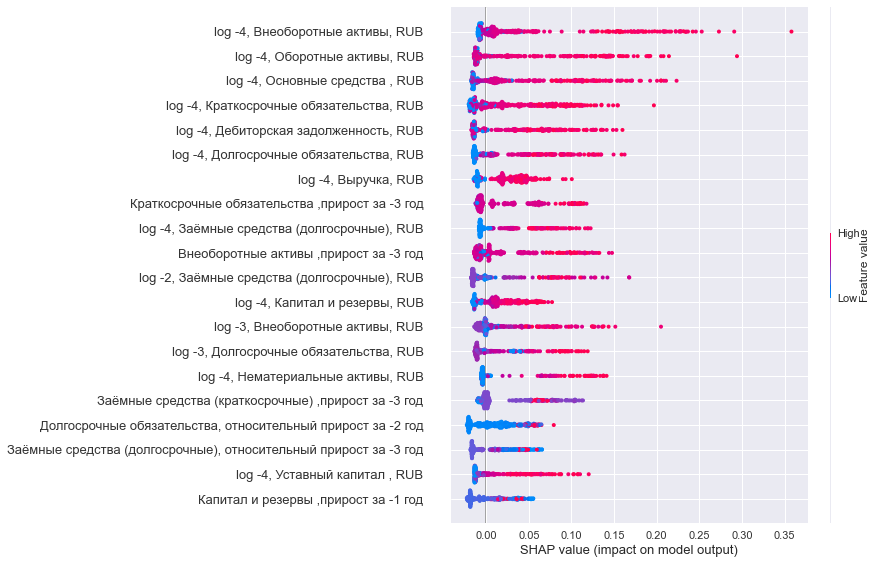

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7378
Fitting model <catboost.core.CatBoostClassifier object at 0x0000023A9BEF0550> with treshold = 0.0...


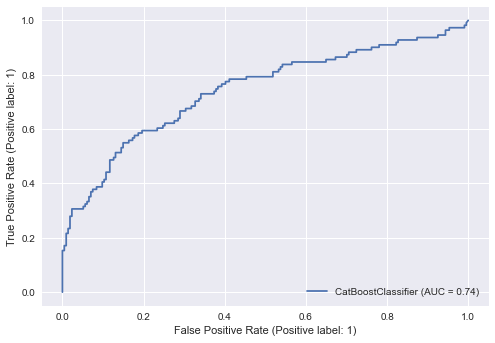

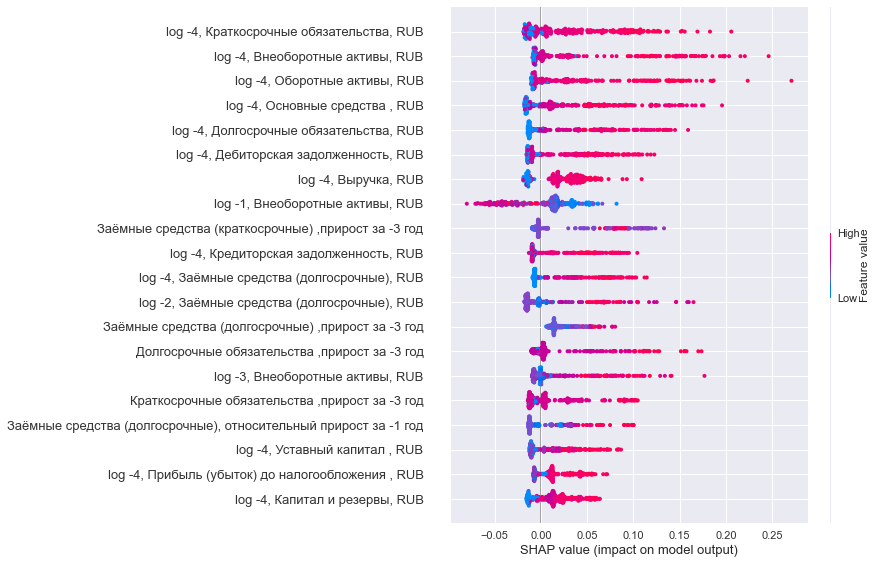

F1 = 0.5092, Precision = 0.3415, Recall = 1.0, Accuracy = 0.3415, ROC_AUC = 0.7418


In [6]:
catboost_fit_predict(df, 'all_features')

## No features

In [7]:
df = create_df_0years_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False)

In [8]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]

Fitting model <catboost.core.CatBoostClassifier object at 0x0000023A9D4B0EB0> with treshold = 0.5...


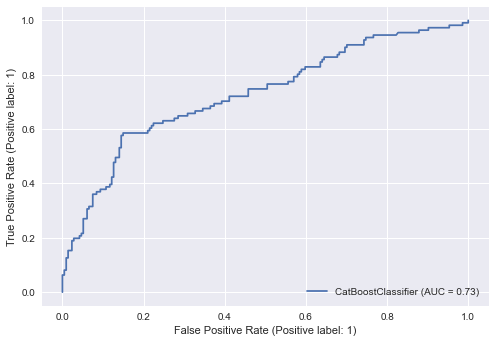

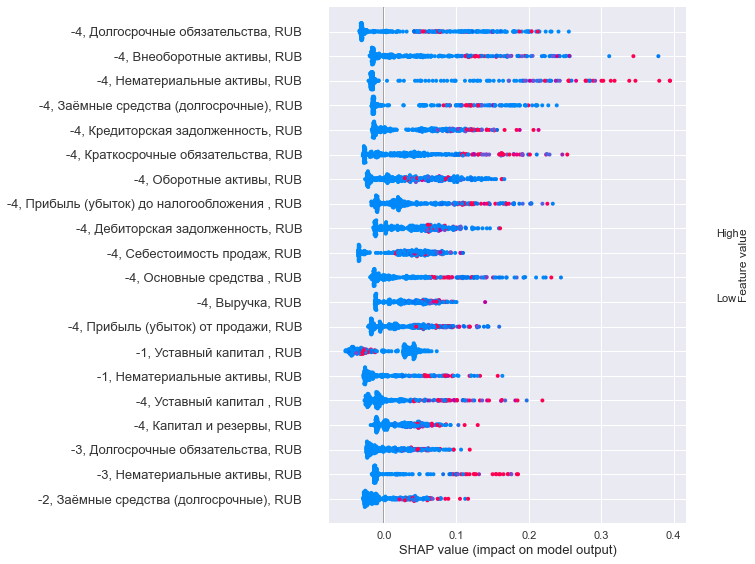

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7287
Fitting model <catboost.core.CatBoostClassifier object at 0x0000023A9D4B0EB0> with treshold = 0.0...


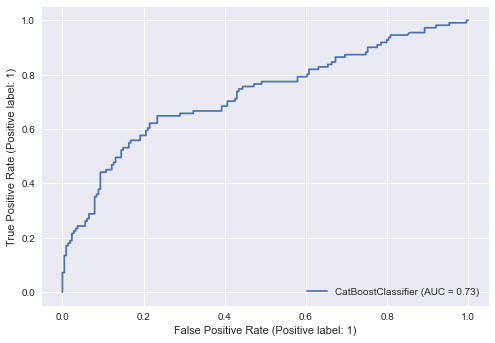

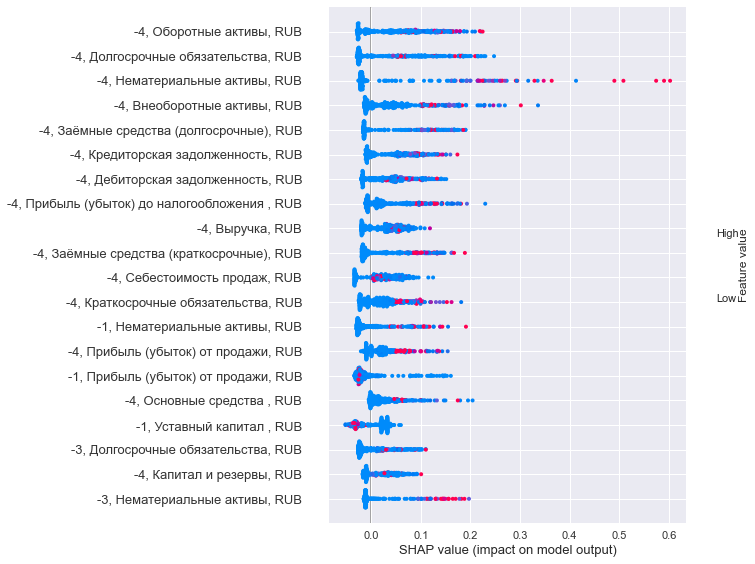

F1 = 0.5103, Precision = 0.3426, Recall = 1.0, Accuracy = 0.3446, ROC_AUC = 0.7255


In [9]:
catboost_fit_predict(df, 'no_features')